In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

import urllib.request as ur
import os

import datetime

In [2]:
# Get data updated
data = pd.read_csv('us_covid19_daily.csv')
try:
    data.to_csv('data_usa.csv', index=False)
    print("\n")
except:
    print("BAD", url)

In [3]:
config = {
    'days_to_forecast': 10,
    'global_degree': 5,
    'new_case_degree': 3,
    'deaths': 3,
    'time': int(str(datetime.datetime.now().time())[0:2]),
    'update_data': 18,
    'start_date': datetime.date(2020, 2, 16)
}

path_img = 'img_usa/'
path_data = 'save_data_usa/'


In [4]:
# Define linear regression  methods
def train_model(x, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    return model

In [5]:
# Model predictions
def get_predictions(x, model, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)

    return model.predict(x_poly)

In [6]:
# Call model forecasting
def call_model(model_name, model, x, y, days_to_predict, degree):
    y_pred = np.round(get_predictions(x, model, degree), 0).astype(np.int32)

    predictions = forecast(model_name, model, degree, beginning_day=len(x), limit=days_to_predict)
    print("")
    return predictions

In [7]:
# Forecast next days
def forecast(model_name, model, degree, beginning_day=0, limit=10):
    next_days_x = np.array(range(beginning_day, beginning_day + limit)).reshape(-1, 1)
    next_days_pred = np.round(get_predictions(next_days_x, model, degree), 0).astype(np.int32)

    print("The results for " + model_name + " in the following " + str(limit) + " days is:")
    
    for i in range(0, limit):
        print(str(i + 1) + ": " + str(next_days_pred[i]))
    
    collect_predictions(next_days_pred, model_name)
    return next_days_pred

In [8]:
# Plot results
def plot_prediction(y, predictions, title):
    total_days = [datetime.date(2020, 1, 22) + datetime.timedelta(days=int(i)) for i in range(int(y.shape[0]) + predictions.shape[0])]
    if config['time'] >= config['update_data']:
        today = str(datetime.date(2020,11,26))
        last_day = str(datetime.date.today() + datetime.timedelta(days=config['days_to_forecast']))
        print("Noooo")
    else:
        today = str(datetime.date(2020,11,26) - datetime.timedelta(1))
        last_day = str(datetime.date.today() - datetime.timedelta(1) + datetime.timedelta(days=config['days_to_forecast']))

    final_dates = []
    for i in total_days:
        i = str(i)
        final_dates.append(i[5:])

    y = np.array(y)
    y = y.reshape((y.shape[0]), 1)
    predictions = np.array(predictions)
    predictions = predictions.reshape((predictions.shape[0]), 1)

    series = np.concatenate([y, predictions], axis=0)

    #old = load_predictions(title)
    
    print(series[:20])
    print("*******")
    print(y[:10])
    print("/////")

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(final_dates, series, label='Predicted cases')
    ax.plot(y, color='red', label='Verified cases')
    fig.autofmt_xdate()
    plt.gca().xaxis.set_major_locator(plt.LinearLocator(numticks=30))
    ax.axvspan(today[5:], last_day[5:], alpha=0.25)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()
    fig.savefig(path_img + title.replace(" ", "") + ".png")


In [9]:
# Save old predictions
def collect_predictions(data, title):
    if config['time'] >= config['update_data']:
        filename = str(datetime.date(2020,11,26) + datetime.timedelta(1))

    else:
        filename = str(datetime.date(2020,11,26))

    filename = filename.replace('-', '_')
    np.save(path_data + title.replace(" ", "") + filename + '.npy', data)



In [10]:
def load_predictions(title):
    start = config['start_date']
    predictions = [np.nan] * 21
    if config['time'] >= config['update_data']:
        while start != datetime.date(2020,11,26) + datetime.timedelta(1):
            filename = str(start)
            to_append = np.load(path_data + title.replace(" ", "") + filename.replace('-', '_') + '.npy')
            predictions.append(to_append)
            start = start + + datetime.timedelta(1)
    else:
        while start != datetime.date(2020,11,26):
            filename = str(start)
            to_append = np.load(path_data + title.replace(" ", "") + filename.replace('-', '_') + '.npy')
            predictions.append(to_append[0])
            start = start + + datetime.timedelta(1)
    predictions = np.array(predictions)
    print(predictions.shape)
    return predictions



In [11]:
# Arrange data and run the routine
def routine(series, title, degree):
    first_c = np.array(range(0, series.shape[0]))
    first_c = first_c.reshape((first_c.shape[0]), 1)
    series = series.reshape((series.shape[0], 1))
    series = np.concatenate([first_c, series], axis=1)

    x = series[:, 0].reshape(-1, 1)
    y = series[:, 1]

    model = train_model(x, y, degree)
    predictions = call_model(title, model, x, y, config["days_to_forecast"], degree)
    plot_prediction(y, predictions, title)
    return predictions


In [12]:
# Get series
series = pd.read_csv('data_usa.csv')

series_cases = series['totalTestResults']
series_cases = np.array(series_cases.fillna(0))

series_positive = series['positive']
series_positive = np.array(series_positive.fillna(0))

series_deaths = series['death']
series_deaths = np.array(series_deaths.fillna(0))

partition = series_cases.shape[0]

The results for USA total cases prediction in the following 10 days is:
1: 206688088
2: 208767988
3: 210878345
4: 213019750
5: 215192801
6: 217398102
7: 219636266
8: 221907916
9: 224213680
10: 226554196

Noooo
[[ 1]
 [ 2]
 [ 2]
 [ 2]
 [ 2]
 [ 3]
 [ 3]
 [ 5]
 [ 5]
 [ 8]
 [ 8]
 [ 8]
 [11]
 [15]
 [15]
 [16]
 [16]
 [18]
 [18]
 [19]]
*******
[[1]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [5]
 [5]
 [8]]
/////


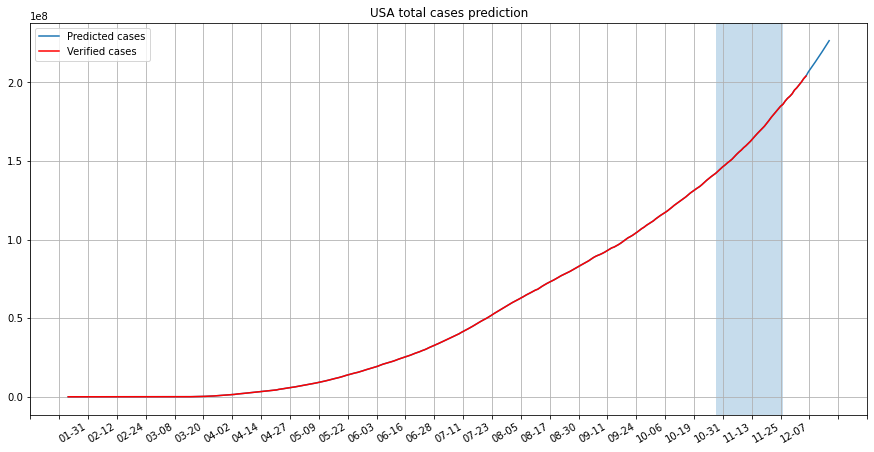

The results for USA new cases in the following 10 days is:
1: 13133393
2: 13232664
3: 13332434
4: 13432706
5: 13533481
6: 13634760
7: 13736544
8: 13838835
9: 13941634
10: 14044942

Noooo
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
*******
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
/////


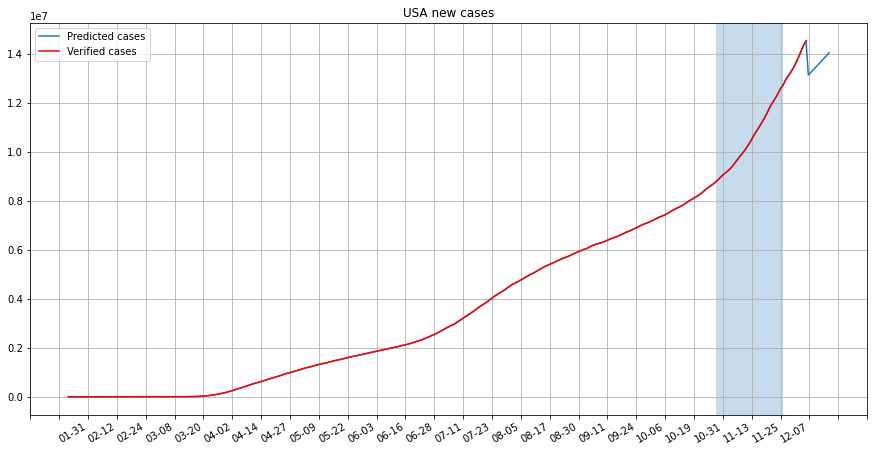

The results for USA death prediction in the following 10 days is:
1: 251303
2: 251787
3: 252264
4: 252734
5: 253197
6: 253653
7: 254102
8: 254544
9: 254978
10: 255406

Noooo
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
*******
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
/////


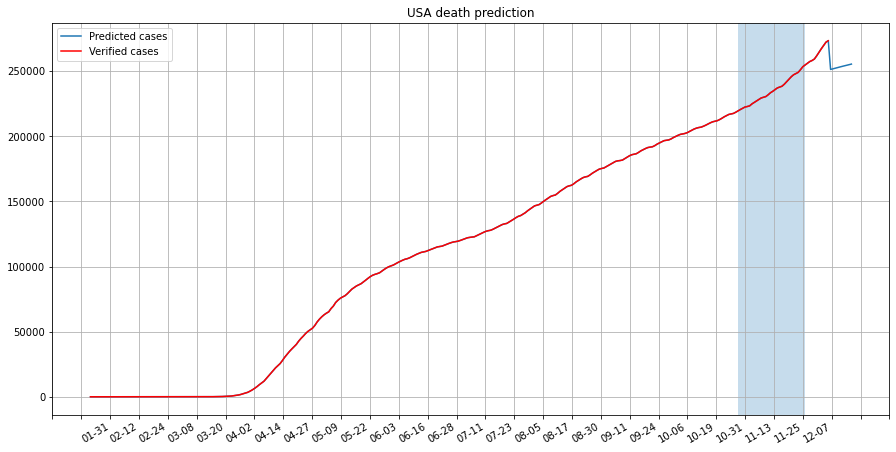

In [13]:
# Train and forecast
predictions1 = routine(series_cases[0:partition], 'USA total cases prediction', config['global_degree'])
predictions2 = routine(series_positive[0:partition], 'USA new cases', config['new_case_degree'])
predictions3 = routine(series_deaths[0:partition], 'USA death prediction', config['deaths'])

In [14]:
def quantization(predictions, real_cases):
    eps = 1e-6
    e = (np.abs(predictions - real_cases))/(real_cases+eps)
    return e

In [15]:
#Quantization
df = series[series['date'] > 20201126]

real_total_cases = df["totalTestResults"]
real_positive = df["positive"]
real_new_deaths = df["death"]

e_total = quantization(predictions1, real_total_cases)
e_positive = quantization(predictions2, real_positive)
e_deaths = quantization(predictions3, real_new_deaths)

print(e_total)
print(e_positive)
print(e_deaths)

310    0.098391
311    0.099456
312    0.103076
313    0.105010
314    0.102890
315    0.105921
316    0.107011
317    0.108101
318    0.107615
319    0.110212
Name: totalTestResults, dtype: float64
310    0.017993
311    0.013548
312    0.010720
313    0.007055
314    0.001341
315    0.005572
316    0.013276
317    0.021727
318    0.028949
319    0.033652
Name: positive, dtype: float64
310    0.018854
311    0.021719
312    0.022914
313    0.025382
314    0.032820
315    0.041089
316    0.049119
317    0.056514
318    0.063394
319    0.065727
Name: death, dtype: float64
